## Patrick Adams 
## 1231065
### DTSC 620 Project 1

## Part 1: Decision Tree

In [1]:
#imports
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn import tree

import matplotlib.pyplot as plt

In [2]:
# loading the dataset into a dataframe
spam_df = pd.read_csv("spam.csv")

In [3]:
spam_df.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [4]:
#Using LabelEncoder to transform categorical data
class_le = spam_df[["Class"]].apply(LabelEncoder().fit_transform)

In [5]:
#dropping original categorical data
spam_df.drop(["Class"], axis = 1, inplace=True)

In [6]:
#merge dummy variables with the main dataframe
spam_df = pd.concat([spam_df, class_le], axis=1)

In [7]:
spam_df.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,0
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,0
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,0
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,1
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,1


In [8]:
X = spam_df.drop("Class", axis=1)
y = spam_df["Class"]

In [9]:
#Splitting dataset into trainig set and testing set, 20-80. About 1000 training and 3600 testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [10]:
#Creating the classifier and training it
clf = DecisionTreeClassifier(criterion='entropy')

clf = clf.fit(X_train, y_train)

In [11]:
#Predicitng the response

y_pred = clf.predict(X_test)

## Classification Accuracy:

In [12]:
#Evaluating the model, looking at classification accuracy

print("Classification Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Classification Accuracy:  0.8837272480304265


## Per Class Classification Accuracy: 

In [13]:
#using classification_report to find per-class classification accuracy
print("Per-class Classification Accuracy: \n\n", metrics.classification_report(y_test,y_pred))

Per-class Classification Accuracy: 

               precision    recall  f1-score   support

           0       0.92      0.88      0.90      2232
           1       0.83      0.89      0.86      1449

    accuracy                           0.88      3681
   macro avg       0.88      0.88      0.88      3681
weighted avg       0.89      0.88      0.88      3681



## Confusion Matrix: 

In [14]:
#using confusion matrix on the test instances

matrix = metrics.confusion_matrix(y_test,y_pred)
print(matrix)


[[1968  264]
 [ 164 1285]]


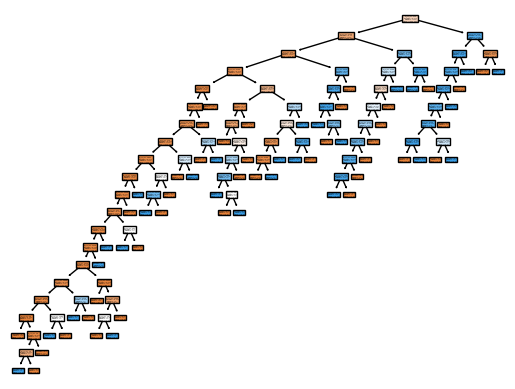

In [15]:
Tree = tree.plot_tree(clf, filled = True)

## Part 2: Random Forest (Default Parameters)

In [16]:
rfc = RandomForestClassifier()

In [17]:
#using default params to start, will optimize later on
rfc = rfc.fit(X_train, y_train)

In [18]:
#Predicitng the response

y_pred_rfc = rfc.predict(X_test)

## Classification Accuracy:

In [19]:
#Evaluating the model, looking at classification accuracy

print("Classification Accuracy: ", metrics.accuracy_score(y_test,y_pred_rfc))

Classification Accuracy:  0.932627003531649


## Per Class Classification Accuracy:

In [20]:
#using classification_report to find per-class classification accuracy
print("Per-class Classification Accuracy: \n\n", metrics.classification_report(y_test,y_pred_rfc))

Per-class Classification Accuracy: 

               precision    recall  f1-score   support

           0       0.94      0.95      0.94      2232
           1       0.92      0.91      0.91      1449

    accuracy                           0.93      3681
   macro avg       0.93      0.93      0.93      3681
weighted avg       0.93      0.93      0.93      3681



## Confusion Matrix:

In [21]:
#using confusion matrix on the test instances

matrix = metrics.confusion_matrix(y_test,y_pred_rfc)
print(matrix)

[[2114  118]
 [ 130 1319]]


## Random Forest Classifier (Optimized Parameters)

In [22]:
rfc_optimized = RandomForestClassifier()

In [26]:
#Inputting different paramters to use a GridSearch and find the most optimal params
n_estimators = [10, 50, 100, 500, 1000, 5000]
max_depth = [1,5,10]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

param = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

gs = GridSearchCV(rfc_optimized, param)

In [27]:
#fitting the data into the GridSearch
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500, 1000, 5000]})

In [28]:
print(gs.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


In [52]:
rfc_optimized = RandomForestClassifier(n_estimators= 500, criterion='entropy',
                                       max_depth = 10, min_samples_leaf = 1,
                                          min_samples_split = 5, max_features='auto')

rfc_optimized.fit(X_train, y_train)
rfc_optimized_pred = rfc_optimized.predict(X_test)

## Classification Accuracy:

In [53]:
#Evaluating the model, looking at classification accuracy

print("Classification Accuracy: ", metrics.accuracy_score(y_test,rfc_optimized_pred))

Classification Accuracy:  0.9312686769899484


## Per Class Classification Accuracy:

In [54]:
#using classification_report to find per-class classification accuracy
print("Per-class Classification Accuracy: \n\n", metrics.classification_report(y_test,rfc_optimized_pred))

Per-class Classification Accuracy: 

               precision    recall  f1-score   support

           0       0.94      0.95      0.94      2232
           1       0.92      0.90      0.91      1449

    accuracy                           0.93      3681
   macro avg       0.93      0.93      0.93      3681
weighted avg       0.93      0.93      0.93      3681



## Confusion Matrix:


In [55]:
matrix = metrics.confusion_matrix(y_test,rfc_optimized_pred)
print(matrix)

[[2123  109]
 [ 144 1305]]
